## Regression Analysis on House Price Dataset :

This project focuses on conducting a comprehensive regression analysis on a house price dataset to predict housing prices based on various features. The dataset is sourced from Kaggle and contains information such as the number of bedrooms, square footage, location, and other relevant features.

### Importing Libraries :

Importing Python libraries for data analysis and visualization, including pandas for data manipulation, numpy for numerical operations, seaborn and matplotlib for plotting, and yellowbrick for visualization of machine learning results, scikit-learn for machine learning tasks such as imputation and linear regression, and statsmodels for statistical modeling, including generalized linear models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm

from scipy import stats


from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

Importing train dataframe 

In [2]:
train_df = pd.read_csv('train.csv', index_col = [0])

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 80)

Importing test dataframe 

In [5]:
test_df = pd.read_csv('test.csv', index_col = [0])
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test_df.shape

(1459, 79)

### Preprocessing :

Preprocessing in the context of data analysis and machine learning involves the preparation and transformation of raw data to make it suitable for model training and analysis. It includes various steps such as handling missing values, scaling or normalizing features, encoding categorical variables, and splitting the data into training and testing sets. Preprocessing ensures that the data meets the requirements of the chosen machine learning algorithm, enhances model performance, and facilitates accurate and meaningful insights during analysis

Concatenating two Pandas DataFrames, 'train_df' and 'test_df', vertically (along rows), and displaying the first few rows using the head().

In [7]:
dataframe = pd.concat([train_df, test_df])
dataframe.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
dataframe.shape

(2919, 80)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [10]:
dataframe.select_dtypes(include = 'object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
dataframe.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64


Calculating the total number of missing values for each column in the 'dataframe' DataFrame using the isnull() method, summing them up, and subsequently sorting the results in descending order

In [12]:
total_missing = dataframe.isnull().sum().sort_values(ascending = False)

In [13]:
total_missing

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
CentralAir         0
Length: 80, dtype: int64

Computing the percentage of missing values for each column in the 'dataframe' DataFrame by dividing the count of missing values by the total count of values, and then sorting the results in descending order

In [14]:
missing_in_percent = (dataframe.isnull().sum() / dataframe.isnull().count()).sort_values(ascending = False)

In [15]:
missing_in_percent

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
                  ...   
1stFlrSF        0.000000
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
CentralAir      0.000000
Length: 80, dtype: float64

Combining the 'total_missing' and 'missing_in_percent' DataFrames horizontally (along columns) using the pd.concat function with specified column keys ("Total" and "Percent)

In [16]:
missing_data = pd.concat([total_missing, missing_in_percent], 
                         axis = 1, 
                         keys = ["Total", "Percent"])

In [17]:
missing_data.head(25)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471



Identifying columns with missing values exceeding 15% (excluding the "SalePrice" column), and then removing those columns, results in an updated 'dataframe'.

In [18]:

missing_values = [column for column in dataframe.columns
                  if missing_in_percent.get(column, 0) > 0.15 and column != "SalePrice"]

dataframe = dataframe.loc[:, ~dataframe.columns.isin(missing_values)]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2917 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

### SimpleImputer :

SimpleImputer class from scikit-learn is utilized for handling missing values in a dataset. It offers a straightforward approach to replace missing values by employing different strategies such as mean, median, most frequent, or a constant value. By fitting the imputer to the dataset, it learns the required imputation strategy and can transform the data accordingly. 

Creating a SimpleImputer object with the strategy set to "most_frequent" and applying it to fill missing values in the 'dataframe'

In [19]:
imputer = SimpleImputer(strategy="most_frequent")

imputer.fit_transform(dataframe)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil


Iterating through columns in the 'dataframe', checking if the data type is 'object', and converting those columns to numerical codes

In [20]:
for feature in dataframe.columns:
    if dataframe[feature].dtype == 'object':
       dataframe[feature] = pd.Categorical(dataframe[feature]).codes


Slicing the 'dataframe' to create a training DataFrame 'train_df' containing the first 1460 rows, and then defining predictor variables 'x' by dropping the "SalePrice" column and the target variable 'y' as 'train_df.SalePrice'.

In [21]:
train_df = dataframe.iloc[:1460]

x = train_df.drop(["SalePrice"], axis = 1)
y = train_df.SalePrice

In [22]:
x.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
2,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
3,60,3,11250,1,0,3,0,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
4,70,3,9550,1,0,3,0,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
5,60,3,14260,1,0,3,0,2,0,15,...,84,0,0,0,0,0,12,2008,8,4


In [23]:
y.head()

Id
1    208500.0
2    181500.0
3    223500.0
4    140000.0
5    250000.0
Name: SalePrice, dtype: float64

### Splitting Dataset : 


Splitting a dataset refers to dividing it into distinct subsets for training and testing purposes in machine learning. The typical split involves creating a training set, used to train and build a predictive model, and a testing set, employed to evaluate the model's performance on unseen data


Splitting the data into training and testing sets using the train_test_split function with a test size of 0.2 and a random state of 42. The resulting sets are 'x_train', 'x_test' for predictor variables, and 'y_train', 'y_test' for the target variable. 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 73), (292, 73), (1168,), (292,))

Calculating the first quartile (Q1) and the third quartile (Q3) for the predictor variables in the training set 'x_train' using the quantile method with the arguments 0.25 and 0.75,

In [25]:
Q1 = x_train.quantile(0.25)

Q3 = x_train.quantile(0.75)

In [26]:
Q1.head(25)

MSSubClass        20.00
MSZoning           3.00
LotArea         7587.25
Street             1.00
LotShape           0.00
LandContour        3.00
Utilities          0.00
LotConfig          1.00
LandSlope          0.00
Neighborhood       7.00
Condition1         2.00
Condition2         2.00
BldgType           0.00
HouseStyle         2.00
OverallQual        5.00
OverallCond        5.00
YearBuilt       1953.00
YearRemodAdd    1966.00
RoofStyle          1.00
RoofMatl           1.00
Exterior1st        8.00
Exterior2nd        8.00
MasVnrType         1.00
MasVnrArea         0.00
ExterQual          2.00
Name: 0.25, dtype: float64

In [27]:
Q3.head(25)

MSSubClass         70.0
MSZoning            3.0
LotArea         11700.0
Street              1.0
LotShape            3.0
LandContour         3.0
Utilities           0.0
LotConfig           4.0
LandSlope           0.0
Neighborhood       17.0
Condition1          2.0
Condition2          2.0
BldgType            0.0
HouseStyle          5.0
OverallQual         7.0
OverallCond         6.0
YearBuilt        2001.0
YearRemodAdd     2004.0
RoofStyle           1.0
RoofMatl            1.0
Exterior1st        12.0
Exterior2nd        13.0
MasVnrType          2.0
MasVnrArea        166.0
ExterQual           3.0
Name: 0.75, dtype: float64

### The Interquartile Range (IQR) :

The Interquartile Range (IQR) is a measure of statistical dispersion, representing the range between the first quartile (25th percentile) and the third quartile (75th percentile) of a dataset. It provides insights into the spread of the middle 50% of the data and is calculated as follows:

\[ IQR = Q3 - Q1 \]

where \( Q1 \) is the first quartile and \( Q3 \) is the third quartile. IQR is often used in statistics to identify and handle outliers, as values outside a certain range beyond the quartiles may be considered as potential outliers.


Calculating the Interquartile Range (IQR) by subtracting the first quartile (Q1) from the third quartile (Q3) for the predictor variables in the training set 'x_train'.

In [28]:
IQR = Q3 - Q1

IQR.head(25)

MSSubClass        50.00
MSZoning           0.00
LotArea         4112.75
Street             0.00
LotShape           3.00
LandContour        0.00
Utilities          0.00
LotConfig          3.00
LandSlope          0.00
Neighborhood      10.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         3.00
OverallQual        2.00
OverallCond        1.00
YearBuilt         48.00
YearRemodAdd      38.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        4.00
Exterior2nd        5.00
MasVnrType         1.00
MasVnrArea       166.00
ExterQual          1.00
dtype: float64

Calculating lower and upper bounds for outlier detection based on the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR). The lower bound is computed as Q1−1.5×IQR and the upper bound as Q3+1.5×IQR. 

In [29]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### Outlier :

 An outlier is an observation that significantly deviates from the overall pattern of a dataset. In the context of linear regression or statistical analysis, outliers can exert a notable impact on the model's performance, potentially influencing parameter estimates and overall model fit. Identifying and handling outliers is crucial for ensuring the robustness and accuracy of statistical analyses, as these extreme observations can skew results and affect the reliability of predictions. 


Filtering out outliers from the training and testing sets based on the calculated lower and upper bounds.

In [30]:
x_train_no_outlier = x_train[((x_train >= lower_bound) & (x_train <= upper_bound)).all(axis = 1)]
y_train_no_outlier = y_train.loc[x_train_no_outlier.index]

x_test_no_outlier = x_test[((x_test >= lower_bound) & (x_test <= upper_bound)).all(axis = 1)]
y_test_no_outlier = y_test.loc[x_test_no_outlier.index]


###  Linear Regression :

Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. In a simple linear regression, there is one independent variable, while multiple independent variables are considered in multiple linear regression. The model assumes a linear association between the variables, and the goal is to find the coefficients that minimize the sum of squared differences between the predicted and actual values. The resulting linear equation can be used for predicting the dependent variable based on the values of the independent variables. 


Creating a Linear Regression model ('lin_reg'), fitting it to the training data without outliers ('x_train_no_outlier', 'y_train_no_outlier'), and predicting the target variable for the training set

In [31]:
lin_reg = LinearRegression()

lin_reg.fit(x_train_no_outlier, y_train_no_outlier)

y_pred = lin_reg.predict(x_train_no_outlier)


Displaying the coefficients (weights) and the intercept of the trained Linear Regression model.

In [32]:
weights = lin_reg.coef_
intercept = lin_reg.intercept_

print('Coefficients: \n', weights[:25])
print('Interceptor: \n', intercept)

Coefficients: 
 [ 2.70230356e+02  3.96848510e-09  1.24169114e+00  8.18246804e-10
 -5.96857724e+02 -4.51834126e-10 -9.16315912e-11 -5.41581255e+02
 -2.50679477e-11  1.01769791e+02 -7.76481102e-11 -3.18323146e-12
 -7.38964445e-12 -3.65863971e+03  6.85849826e+03  8.54214186e+03
  9.50894135e+02  9.20226237e+01 -1.59161573e-12  1.59161573e-12
 -7.30232189e+02  2.04938239e+02  3.87419469e+03  1.05870269e+01
  6.89688668e+02]
Interceptor: 
 -1910991.4145089616


### Ordinary Least Squares (OLS) :

Ordinary Least Squares (OLS) is a method used in linear regression analysis to estimate the parameters of a linear model. The goal of OLS is to find the line that minimizes the sum of the squared differences between the observed and predicted values of the dependent variable. In the context of linear regression, OLS aims to identify the coefficients for the predictor variables that best fit the observed data. The resulting model represents the linear relationship between the predictors and the dependent variable. 

Performing Ordinary Least Squares (OLS) regression using the statsmodels library. The model is fitted to the training data without outliers.

In [33]:
model = sm.OLS(y_train_no_outlier, sm.add_constant(x_train_no_outlier))

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     44.30
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.75e-48
Time:                        11:52:57   Log-Likelihood:                -1500.2
No. Observations:                 142   AIC:                             3082.
Df Residuals:                     101   BIC:                             3204.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass      270.2304    219.682      1.230      0.222    -165.560     706.021
MSZoning      -2.293e+04   2.16e+04     -1.063      0.291   -6.57e+04    1.99e+04
LotArea           1.2417      0.636      1.954      0.053      -0.019       2.502
Street        -7643.9657   7193.929     -1.063      0.291   -2.19e+04    6626.854
LotShape       -596.8577    791.270     -0.754      0.452   -2166.524     972.808
LandContour   -2.293e+04   2.16e+04     -1.063      0.291   -6.57e+04    1.99e+04
Utilities     -1.012e-08   9.43e-09     -1.073      0.286   -2.88e-08    8.58e-09
LotConfig      -541.5813    670.114     -0.808      0.421   -1870.908     787.745
LandSlope      -1.37e-09   1.25e-09     -1.096      0.276   -3.85e-09    1.11e-09
Neighborhood    101.7698    223.438      0.455      0.650    -341.471     545.010
Condition1    -1.529e+04   1.44e+04     -1.063      0.291   -4.38e+04    1.33e+04
Condition2    -1.529e+04   1.44e+04     -1.063      0.291   -4.38e+04    1.33e+04
BldgType      -1.572e-10   1.48e-10     -1.060      0.292   -4.51e-10    1.37e-10
HouseStyle    -3658.6397   2708.935     -1.351      0.180   -9032.438    1715.158
OverallQual    6858.4983   2514.662      2.727      0.008    1870.086    1.18e+04
OverallCond    8542.1419   2622.250      3.258      0.002    3340.303    1.37e+04
YearBuilt       950.8941    498.169      1.909      0.059     -37.339    1939.127
YearRemodAdd     92.0226    150.937      0.610      0.543    -207.397     391.442
RoofStyle     -7643.9657   7193.929     -1.063      0.291   -2.19e+04    6626.854
RoofMatl      -7643.9657   7193.929     -1.063      0.291   -2.19e+04    6626.854
Exterior1st    -730.2322   1133.279     -0.644      0.521   -2978.354    1517.889
Exterior2nd     204.9382    973.968      0.210      0.834   -1727.152    2137.029
MasVnrType     3874.1947   2356.632      1.644      0.103    -800.730    8549.119
MasVnrArea       10.5870     14.104      0.751      0.455     -17.392      38.566
ExterQual       689.6887   3334.948      0.207      0.837   -5925.951    7305.328
ExterCond     -3.058e+04   2.88e+04     -1.063      0.291   -8.77e+04    2.65e+04
Foundation    -3298.6711   5233.867     -0.630      0.530   -1.37e+04    7083.912
BsmtQual      -3668.2515   4464.857     -0.822      0.413   -1.25e+04    5188.823
BsmtCond      -2.293e+04   2.16e+04     -1.063      0.291   -6.57e+04    1.99e+04
BsmtExposure    234.5600    989.416      0.237      0.813   -1728.176    2197.296
BsmtFinType1     99.4082   1035.715      0.096      0.924   -1955.173    2153.989
BsmtFinSF1       20.3156      5.365      3.787      0.000       9.673      30.958
BsmtFinType2  -3.822e+04    3.6e+04     -1.063      0.291    -1.1e+05    3.31e+04
BsmtFinSF2    -9.606e-11   8.84e-11     -1.086      0.280   -2.71e-10    7.93e-11
BsmtUnfSF         0.3121      4.670      0.067   

Creating a probability plot (Q-Q plot) to visualize the residuals of the OLS regression model.

((array([-2.58496643, -2.26298802, -2.07826646, -1.94534707, -1.83990887,
         -1.75167322, -1.67528457, -1.60758177, -1.54653587, -1.49076349,
         -1.43927721, -1.39134645, -1.34641477, -1.30404808, -1.26390094,
         -1.22569365, -1.18919643, -1.15421807, -1.12059764, -1.08819831,
         -1.05690277, -1.02660954, -0.99723025, -0.96868745, -0.94091279,
         -0.91384566, -0.88743203, -0.86162349, -0.83637648, -0.81165167,
         -0.78741335, -0.76362906, -0.7402691 , -0.7173063 , -0.69471565,
         -0.67247411, -0.65056038, -0.62895471, -0.60763873, -0.58659535,
         -0.5658086 , -0.54526351, -0.52494605, -0.50484303, -0.484942  ,
         -0.46523122, -0.44569956, -0.42633648, -0.40713196, -0.38807643,
         -0.36916081, -0.35037636, -0.33171475, -0.31316796, -0.29472829,
         -0.27638829, -0.2581408 , -0.23997886, -0.22189575, -0.20388491,
         -0.18593997, -0.16805472, -0.15022307, -0.13243906, -0.11469684,
         -0.09699065, -0.07931483, -0.

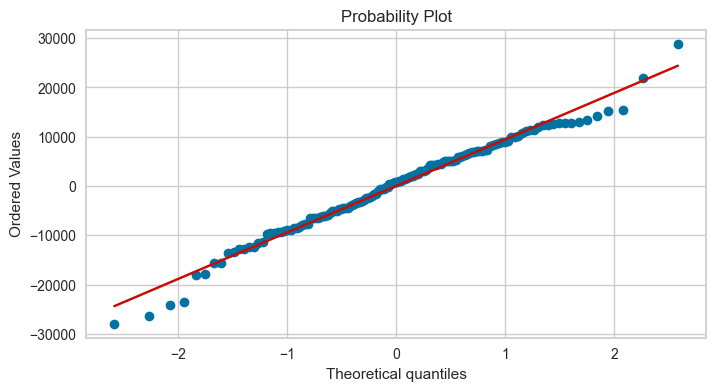

In [34]:
fig, ax = plt.subplots(figsize = (8,4))
stats.probplot(result.resid,plot = plt)

### Quantile-Quantile (Q-Q) plot :

A Quantile-Quantile (Q-Q) plot is a graphical tool used to assess whether a given dataset follows a specific theoretical distribution, such as a normal distribution.In the context of regression analysis, a Q-Q plot of residuals is often employed to check if the residuals conform to the assumptions of a normally distributed error term. If the residuals closely align with a straight line in the Q-Q plot, it suggests that the assumption of normality is reasonable. Deviations from the line may indicate departures from normality, prompting further investigation into the model's assumptions.

Creating a residuals plot using the Yellowbrick library. The plot visualizes the residuals of the linear regression model on both the training and testing sets. The residuals_plot function is used with specified parameters, including the linear regression model, training data, and testing data. The plot includes a Q-Q plot and does not display a histogram. 

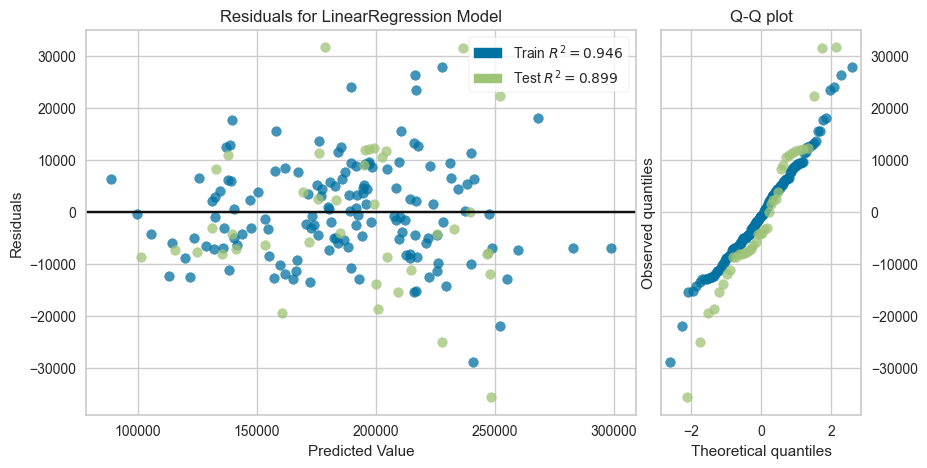

In [35]:
plt.figure(figsize=(10, 5));
viz = residuals_plot(lin_reg, 
                     x_train_no_outlier, 
                     y_train_no_outlier, 
                     x_test_no_outlier, 
                     y_test_no_outlier, 
                     is_fitted = True, qqplot = True, hist = False)

 The plot visualizes the difference between predicted and actual values on the testing set for the linear regression model. The prediction_error function is used with specified parameters, including the linear regression model, testing data.

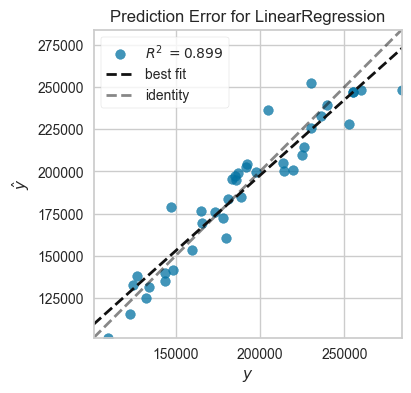

In [36]:
plt.figure(figsize = (8,4))
visualizer = prediction_error(lin_reg, 
                              x_test_no_outlier, 
                              y_test_no_outlier, 
                              is_fitted = True)

### MSE and R2 Score :

Mean Squared Error (MSE) serves as a measure of the average squared differences between the predicted and actual values, providing insight into the model's accuracy. A lower MSE indicates a closer fit of the model to the data.


R2 score, or coefficient of determination, quantifies the proportion of variance in the dependent variable explained by the model. This metric ranges from 0 to 1, where higher values denote a better ability of the model to capture the variability in the data. An R2 score of 1 signifies perfect prediction, while a score of 0 suggests the model lacks explanatory power.


Generating predictions using the trained OLS regression model ('result') on the training data without outliers. Calculating the mean squared error (MSE) between the predicted values and the actual target values using the mean_squared_error function

In [37]:
prediction = result.predict(sm.add_constant(x_train_no_outlier))

mean_square_error = mean_squared_error(y_train_no_outlier, prediction)

In [38]:
prediction

Id
1067    183098.783557
87      177069.366786
32      138306.989033
1111    180632.170649
1147    180613.209374
            ...      
1083    186705.506434
253     185471.670535
131     217394.662428
872     189723.039490
1096    173970.037260
Length: 142, dtype: float64

In [39]:
mean_square_error

87852179.2498032

Calculating the R2 (coefficient of determination) score between the predicted values and the actual target values on the training data without outliers. 

In [40]:
R_squared = r2_score(y_train_no_outlier ,prediction)
R_squared

0.9460720367287944